# Library import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import statsmodels.api as sm

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, ARDRegression, BayesianRidge
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import mean_squared_error

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings

warnings.filterwarnings("ignore")

In [2]:
def get_font_family():
    import platform 
    system_name = platform.system()

    if system_name == "Darwin" : # 맥
        font_family = "AppleGothic"
    elif system_name == "Windows": # 윈도우
        font_family = "Malgun Gothic"
    else: # 리눅스 및 코랩
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv
        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        font_family = "NanumBarunGothic"
    return font_family

plt.style.use("seaborn") # 전체 그래프를 seaborn 스타일로 고정
plt.rc("font", family=get_font_family())
matplotlib.rcParams['axes.unicode_minus'] = False # 그래프에 마이너스 허용

%config InlineBackend.figure_format = 'retina' # 그래프를 더 선명하게 사용


plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 120
plt.rcParams.update({'font.size': 12})

In [3]:
pd.options.display.float_format = '{:.5f}'.format

# Data Load

In [4]:
train = pd.read_csv("./data/train.csv")

In [5]:
train

,이름,팀,WAR,G,타석,타수,득점,안타,2타,3타,...,병살,희타,희비,타율,출루,장타,OPS,wOBA,WRC+,BABIP
0,테임즈,15N1B,10.71000,142,595,472,130,180,42,5,...,7,0,7,0.38100,0.49800,0.79000,1.28800,0.53000,222.30000,0.39003
1,심정수,03현RF,10.19000,133,601,460,110,154,16,1,...,14,0,8,0.33500,0.47800,0.72000,1.19700,0.49800,210.70000,0.28693
2,이승엽,02삼1B,8.96000,133,617,511,123,165,42,2,...,11,0,2,0.32300,0.43600,0.68900,1.12500,0.47200,198.50000,0.33053
3,이대호,10롯3B,8.82000,127,552,478,99,174,13,0,...,15,0,3,0.36400,0.44400,0.66700,1.11100,0.48200,192.40000,0.36111
4,이승엽,03삼1B,8.39000,131,596,479,115,144,23,0,...,11,0,6,0.30100,0.42800,0.69900,1.12700,0.47100,191.20000,0.25882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4379,강한울,15KSS,-1.39000,90,292,264,30,54,8,3,...,2,12,0,0.20500,0.25000,0.25800,0.50800,0.22900,18.50000,0.25352
4380,나종덕,19롯C,-1.41000,104,209,185,12,23,4,0,...,5,7,2,0.12400,0.18800,0.19500,0.38300,0.18000,-4.20000,0.20833
4381,조동화,09SRF,-1.52000,102,191,169,22,30,4,3,...,2,11,0,0.17800,0.22800,0.23700,0.46500,0.20700,1.80000,0.25000
4382,나종덕,18롯C,-1.71000,106,203,177,15,22,3,0,...,2,9,0,0.12400,0.20100,0.17500,0.37600,0.17500,-15.10000,0.22222


In [6]:
train.isna().sum()

이름       0
팀        0
WAR      0
G        0
타석       0
타수       0
득점       0
안타       0
2타       0
3타       0
홈런       0
루타       0
타점       0
도루       0
도실       0
볼넷       0
사구       0
고4       0
삼진       0
병살       0
희타       0
희비       0
타율       0
출루       0
장타       0
OPS      0
wOBA     0
WRC+     0
BABIP    0
dtype: int64

In [7]:
df = train.copy()

In [8]:
df.head()

,이름,팀,WAR,G,타석,타수,득점,안타,2타,3타,...,병살,희타,희비,타율,출루,장타,OPS,wOBA,WRC+,BABIP
0,테임즈,15N1B,10.71000,142,595,472,130,180,42,5,...,7,0,7,0.38100,0.49800,0.79000,1.28800,0.53000,222.30000,0.39003
1,심정수,03현RF,10.19000,133,601,460,110,154,16,1,...,14,0,8,0.33500,0.47800,0.72000,1.19700,0.49800,210.70000,0.28693
2,이승엽,02삼1B,8.96000,133,617,511,123,165,42,2,...,11,0,2,0.32300,0.43600,0.68900,1.12500,0.47200,198.50000,0.33053
3,이대호,10롯3B,8.82000,127,552,478,99,174,13,0,...,15,0,3,0.36400,0.44400,0.66700,1.11100,0.48200,192.40000,0.36111
4,이승엽,03삼1B,8.39000,131,596,479,115,144,23,0,...,11,0,6,0.30100,0.42800,0.69900,1.12700,0.47100,191.20000,0.25882


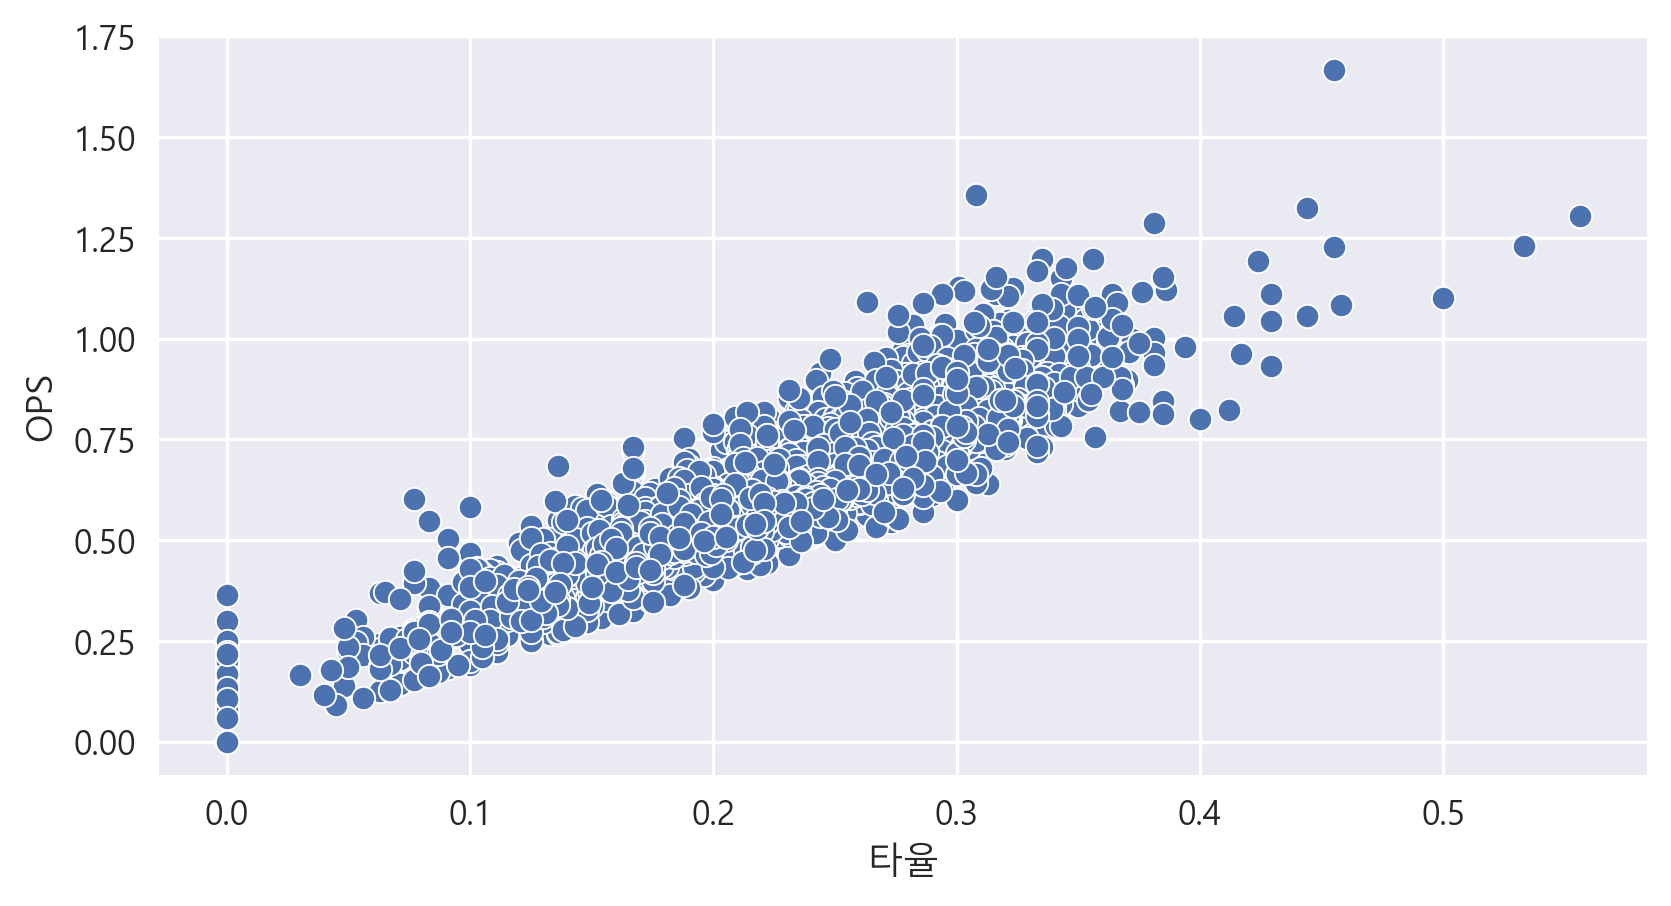

In [9]:
# outlier 존재
sns.scatterplot(x=df["타율"], y=df["OPS"])
plt.show()

In [10]:
avg_iqr = np.subtract(*np.quantile(df["타율"], [0.75, 0.25]))
avg_iqr

0.07599999999999998

In [11]:
df = df[(df["타율"] <= (np.quantile(df["타율"], 0.75) + avg_iqr*1.5)) & (df["타율"] >= (np.quantile(df["타율"], 0.25) - avg_iqr*1.5))]

In [12]:
abs(df.corr()["OPS"]).sort_values(ascending = False)[1:]

wOBA    0.98484
WRC+    0.97043
장타      0.96406
출루      0.88934
타율      0.88448
WAR     0.74106
루타      0.72838
타점      0.72156
홈런      0.68757
안타      0.68495
2타      0.67872
득점      0.67276
볼넷      0.66633
타석      0.64176
타수      0.63233
BABIP   0.61181
삼진      0.58059
G       0.55018
병살      0.52845
희비      0.50322
고4      0.48724
사구      0.47393
3타      0.29035
도실      0.28436
도루      0.23446
희타      0.04493
Name: OPS, dtype: float64

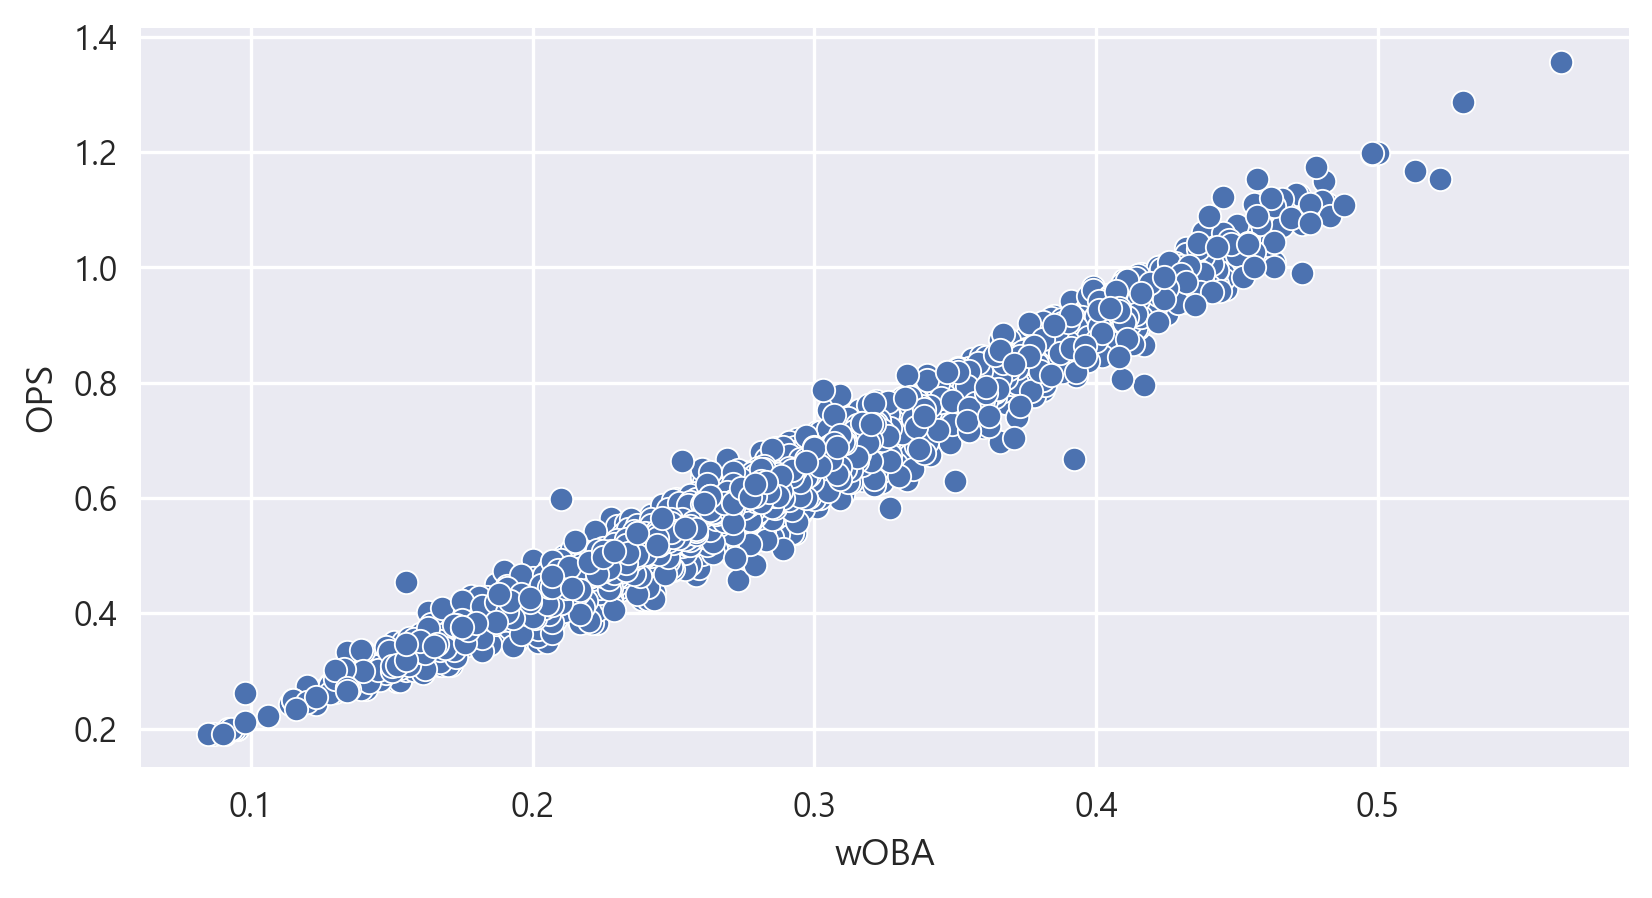

In [13]:
# outlier 제거
sns.scatterplot(x=df["wOBA"], y=df["OPS"])
plt.show()

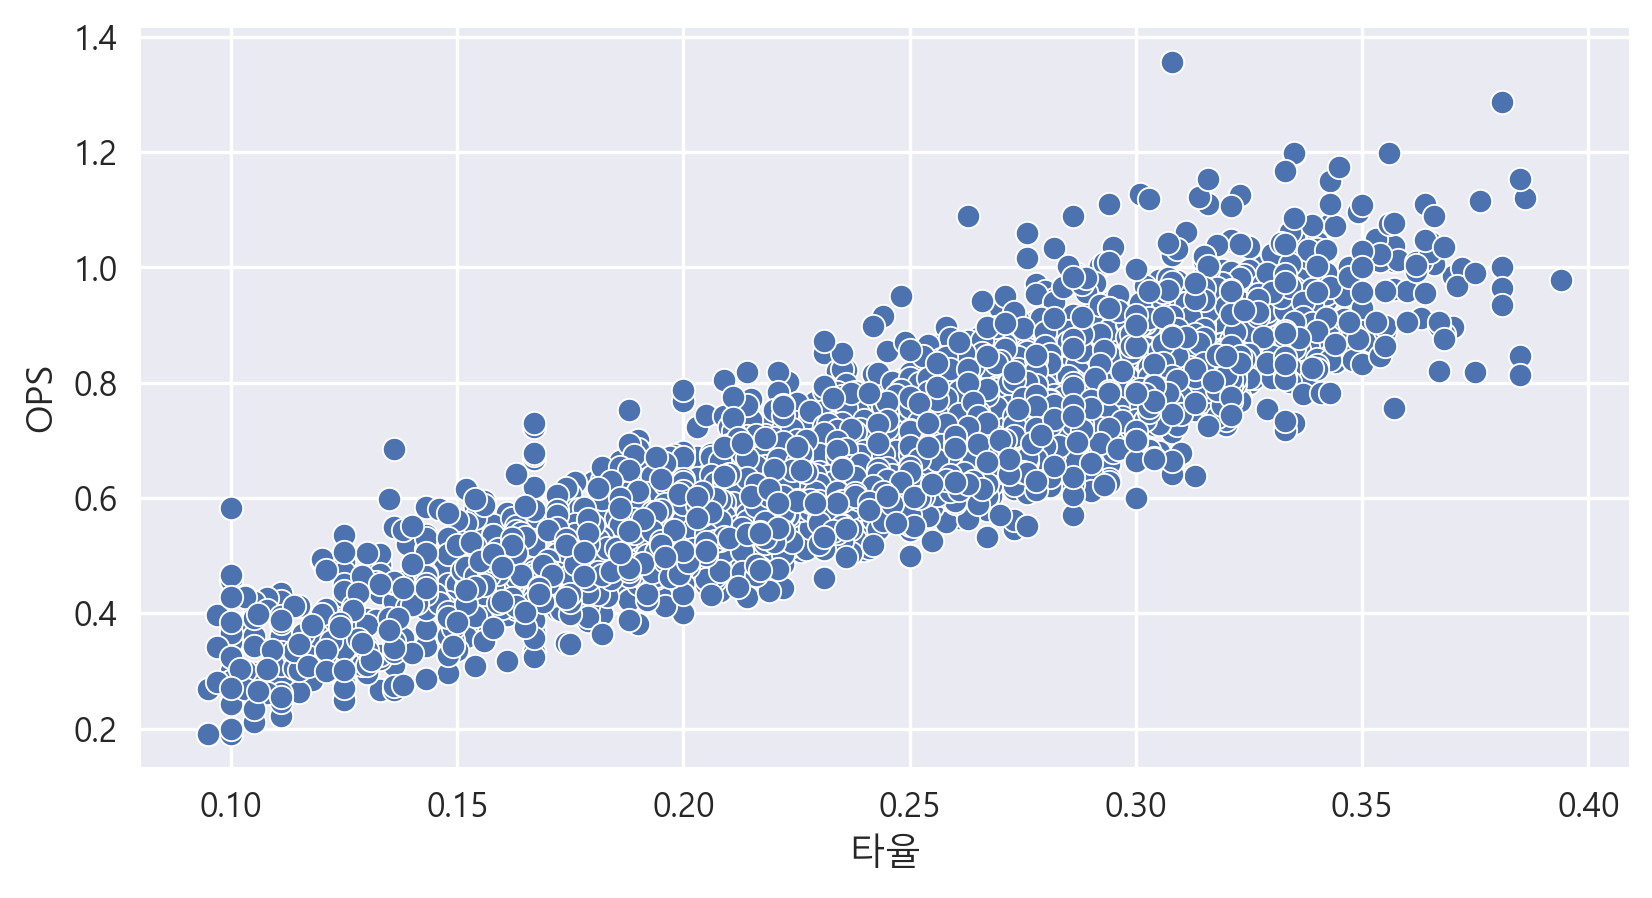

In [14]:
# outlier 제거
sns.scatterplot(x=df["타율"], y=df["OPS"])
plt.show()

In [15]:
df.shape

(4222, 29)

In [16]:
df.columns

Index(['이름', '팀', 'WAR', 'G', '타석', '타수', '득점', '안타', '2타', '3타', '홈런', '루타',
       '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살', '희타', '희비', '타율', '출루',
       '장타', 'OPS', 'wOBA', 'WRC+', 'BABIP'],
      dtype='object')

In [17]:
df = df[['이름', '팀', 'WAR', 'G', '타석', '타수', '득점', '안타', '2타', '3타', '홈런', '루타',
       '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살', '희타', '희비', '타율', '출루',
       '장타', 'wOBA', 'WRC+', 'BABIP', "OPS"]]

In [18]:
df

,이름,팀,WAR,G,타석,타수,득점,안타,2타,3타,...,병살,희타,희비,타율,출루,장타,wOBA,WRC+,BABIP,OPS
0,테임즈,15N1B,10.71000,142,595,472,130,180,42,5,...,7,0,7,0.38100,0.49800,0.79000,0.53000,222.30000,0.39003,1.28800
1,심정수,03현RF,10.19000,133,601,460,110,154,16,1,...,14,0,8,0.33500,0.47800,0.72000,0.49800,210.70000,0.28693,1.19700
2,이승엽,02삼1B,8.96000,133,617,511,123,165,42,2,...,11,0,2,0.32300,0.43600,0.68900,0.47200,198.50000,0.33053,1.12500
3,이대호,10롯3B,8.82000,127,552,478,99,174,13,0,...,15,0,3,0.36400,0.44400,0.66700,0.48200,192.40000,0.36111,1.11100
4,이승엽,03삼1B,8.39000,131,596,479,115,144,23,0,...,11,0,6,0.30100,0.42800,0.69900,0.47100,191.20000,0.25882,1.12700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4379,강한울,15KSS,-1.39000,90,292,264,30,54,8,3,...,2,12,0,0.20500,0.25000,0.25800,0.22900,18.50000,0.25352,0.50800
4380,나종덕,19롯C,-1.41000,104,209,185,12,23,4,0,...,5,7,2,0.12400,0.18800,0.19500,0.18000,-4.20000,0.20833,0.38300
4381,조동화,09SRF,-1.52000,102,191,169,22,30,4,3,...,2,11,0,0.17800,0.22800,0.23700,0.20700,1.80000,0.25000,0.46500
4382,나종덕,18롯C,-1.71000,106,203,177,15,22,3,0,...,2,9,0,0.12400,0.20100,0.17500,0.17500,-15.10000,0.22222,0.37600


In [19]:
df

,이름,팀,WAR,G,타석,타수,득점,안타,2타,3타,...,병살,희타,희비,타율,출루,장타,wOBA,WRC+,BABIP,OPS
0,테임즈,15N1B,10.71000,142,595,472,130,180,42,5,...,7,0,7,0.38100,0.49800,0.79000,0.53000,222.30000,0.39003,1.28800
1,심정수,03현RF,10.19000,133,601,460,110,154,16,1,...,14,0,8,0.33500,0.47800,0.72000,0.49800,210.70000,0.28693,1.19700
2,이승엽,02삼1B,8.96000,133,617,511,123,165,42,2,...,11,0,2,0.32300,0.43600,0.68900,0.47200,198.50000,0.33053,1.12500
3,이대호,10롯3B,8.82000,127,552,478,99,174,13,0,...,15,0,3,0.36400,0.44400,0.66700,0.48200,192.40000,0.36111,1.11100
4,이승엽,03삼1B,8.39000,131,596,479,115,144,23,0,...,11,0,6,0.30100,0.42800,0.69900,0.47100,191.20000,0.25882,1.12700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4379,강한울,15KSS,-1.39000,90,292,264,30,54,8,3,...,2,12,0,0.20500,0.25000,0.25800,0.22900,18.50000,0.25352,0.50800
4380,나종덕,19롯C,-1.41000,104,209,185,12,23,4,0,...,5,7,2,0.12400,0.18800,0.19500,0.18000,-4.20000,0.20833,0.38300
4381,조동화,09SRF,-1.52000,102,191,169,22,30,4,3,...,2,11,0,0.17800,0.22800,0.23700,0.20700,1.80000,0.25000,0.46500
4382,나종덕,18롯C,-1.71000,106,203,177,15,22,3,0,...,2,9,0,0.12400,0.20100,0.17500,0.17500,-15.10000,0.22222,0.37600


In [20]:
df.drop(["이름", "팀"], axis=1, inplace=True)

## data split

In [96]:
X = df.drop("OPS", axis=1)
y = df["OPS"] 

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

In [23]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3377, 26), (845, 26), (3377,), (845,))

In [24]:
ss = StandardScaler()

In [64]:
scaled_X = ss.fit_transform(X)

In [47]:
df.columns = df.columns.str.replace(".","")

In [50]:
df.columns

Index(['WAR', 'G', '타석', '타수', '득점', '안타', '2타', '3타', '홈런', '루타', '타점', '도루',
       '도실', '볼넷', '사구', '고4', '삼진', '병살', '희타', '희비', '타율', '출루', '장타',
       'wOBA', 'WRC+', 'BABIP', 'OPS'],
      dtype='object')

In [57]:
import statsmodels.formula.api as smf

model = smf.ols(formula="OPS ~ WAR + G + 타석 + 타수 + 득점 + 안타 + 홈런 + 루타 + 타점 + 도루 + 도실 \
                + 볼넷 + 사구 + 고4 + 삼진 + 병살 + 희타 + 희비 + 타율 + 출루 + 장타 + wOBA + BABIP", data=df).fit()

In [59]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    OPS   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.031e+07
Date:                Tue, 07 Mar 2023   Prob (F-statistic):               0.00
Time:                        19:15:05   Log-Likelihood:                 26232.
No. Observations:                4222   AIC:                        -5.242e+04
Df Residuals:                    4198   BIC:                        -5.226e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    4.12e-05   5.58e-05      0.739      0.460   -6.81e-05       0.000
WAR        -1.323e-05    1.6e-05     -0.825      0.409   -4.47e-05    1.82e-05
G          -3.541e-07   5.22e-07     -0.678      0.498   -1.38e-06    6.69e-07
타석          1.092e-05   6.03e-05      0.181      0.856      -0.000       0.000
타수          -1.19e-05   6.03e-05     -0.197      0.844      -0.000       0.000
득점         -1.825e-06   1.34e-06     -1.366      0.172   -4.44e-06    7.94e-07
안타          1.293e-06   2.97e-06      0.435      0.663   -4.53e-06    7.11e-06
홈런         -8.061e-06   6.24e-06     -1.291      0.197   -2.03e-05    4.18e-06
루타          1.726e-06   2.21e-06      0.779      0.436   -2.62e-06    6.07e-06
타점           3.55e-06   1.41e-06      2.525      0.012    7.94e-07    6.31e-06
도루          2.244e-06   1.85e-06      1.216      0.224   -1.37e-06    5.86e-06
도실         -8.093e-06    4.6e-06     -1.758      0.079   -1.71e-05     9.3e-07
볼넷         -1.126e-05   6.04e-05     -0.186      0.852      -0.000       0.000
사구          -7.51e-06   6.04e-05     -0.124      0.901      -0.000       0.000
고4         -2.027e-08   6.35e-06     -0.003      0.997   -1.25e-05    1.24e-05
삼진          1.143e-06   7.47e-07      1.529      0.126   -3.22e-07    2.61e-06
병살         -2.197e-06   3.02e-06     -0.728      0.466   -8.11e-06    3.72e-06
희타         -8.821e-06   6.03e-05     -0.146      0.884      -0.000       0.000
희비         -2.482e-05   6.03e-05     -0.412      0.681      -0.000    9.34e-05
타율             0.0004      0.001      0.644      0.520      -0.001       0.002
출루             0.9990      0.001   1132.032      0.000       0.997       1.001
장타             0.9993      0.000   2150.340      0.000       0.998       1.000
wOBA           0.0019      0.001      1.462      0.144      -0.001       0.004
BABIP         -0.0004      0.000     -1.532      0.126      -0.001       0.000
==============================================================================
Omnibus:                      107.505   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              256.746
Skew:                          -0.009   Prob(JB):                     1.77e-56
Kurtosis:                       4.208   Cond. No.                     9.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [109]:
def backward_regression(X, y,
                           initial_list=[], 
                           threshold_out = 0.05, # P-value 임계값 (제거 기준)
                           feature_list = x_train.columns.tolist()
                           ):
    
    
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adj_r_squared_list = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    included = feature_list
    while True:
        changed=False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[feature_list]))).fit(disp=0)
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:] # 각 feature의 P값을 의미함
        worst_pval = pvalues.max()	# P 값이 가장 높은 것 선정
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
        
        step += 1
        steps.append(step)        
        adj_r_squared = sm.OLS(y, sm.add_constant(pd.DataFrame(X[feature_list]))).fit(disp=0).rsquared_adj
        adj_r_squared_list.append(adj_r_squared)
        sv_per_step.append(included.copy())
        
        if not changed:
            break
      
    return included,step,steps,adj_r_squared_list,sv_per_step

backward_valriables_function,step,steps,adj_r_squared_list,sv_per_step = backward_regression(x_train, y_train)

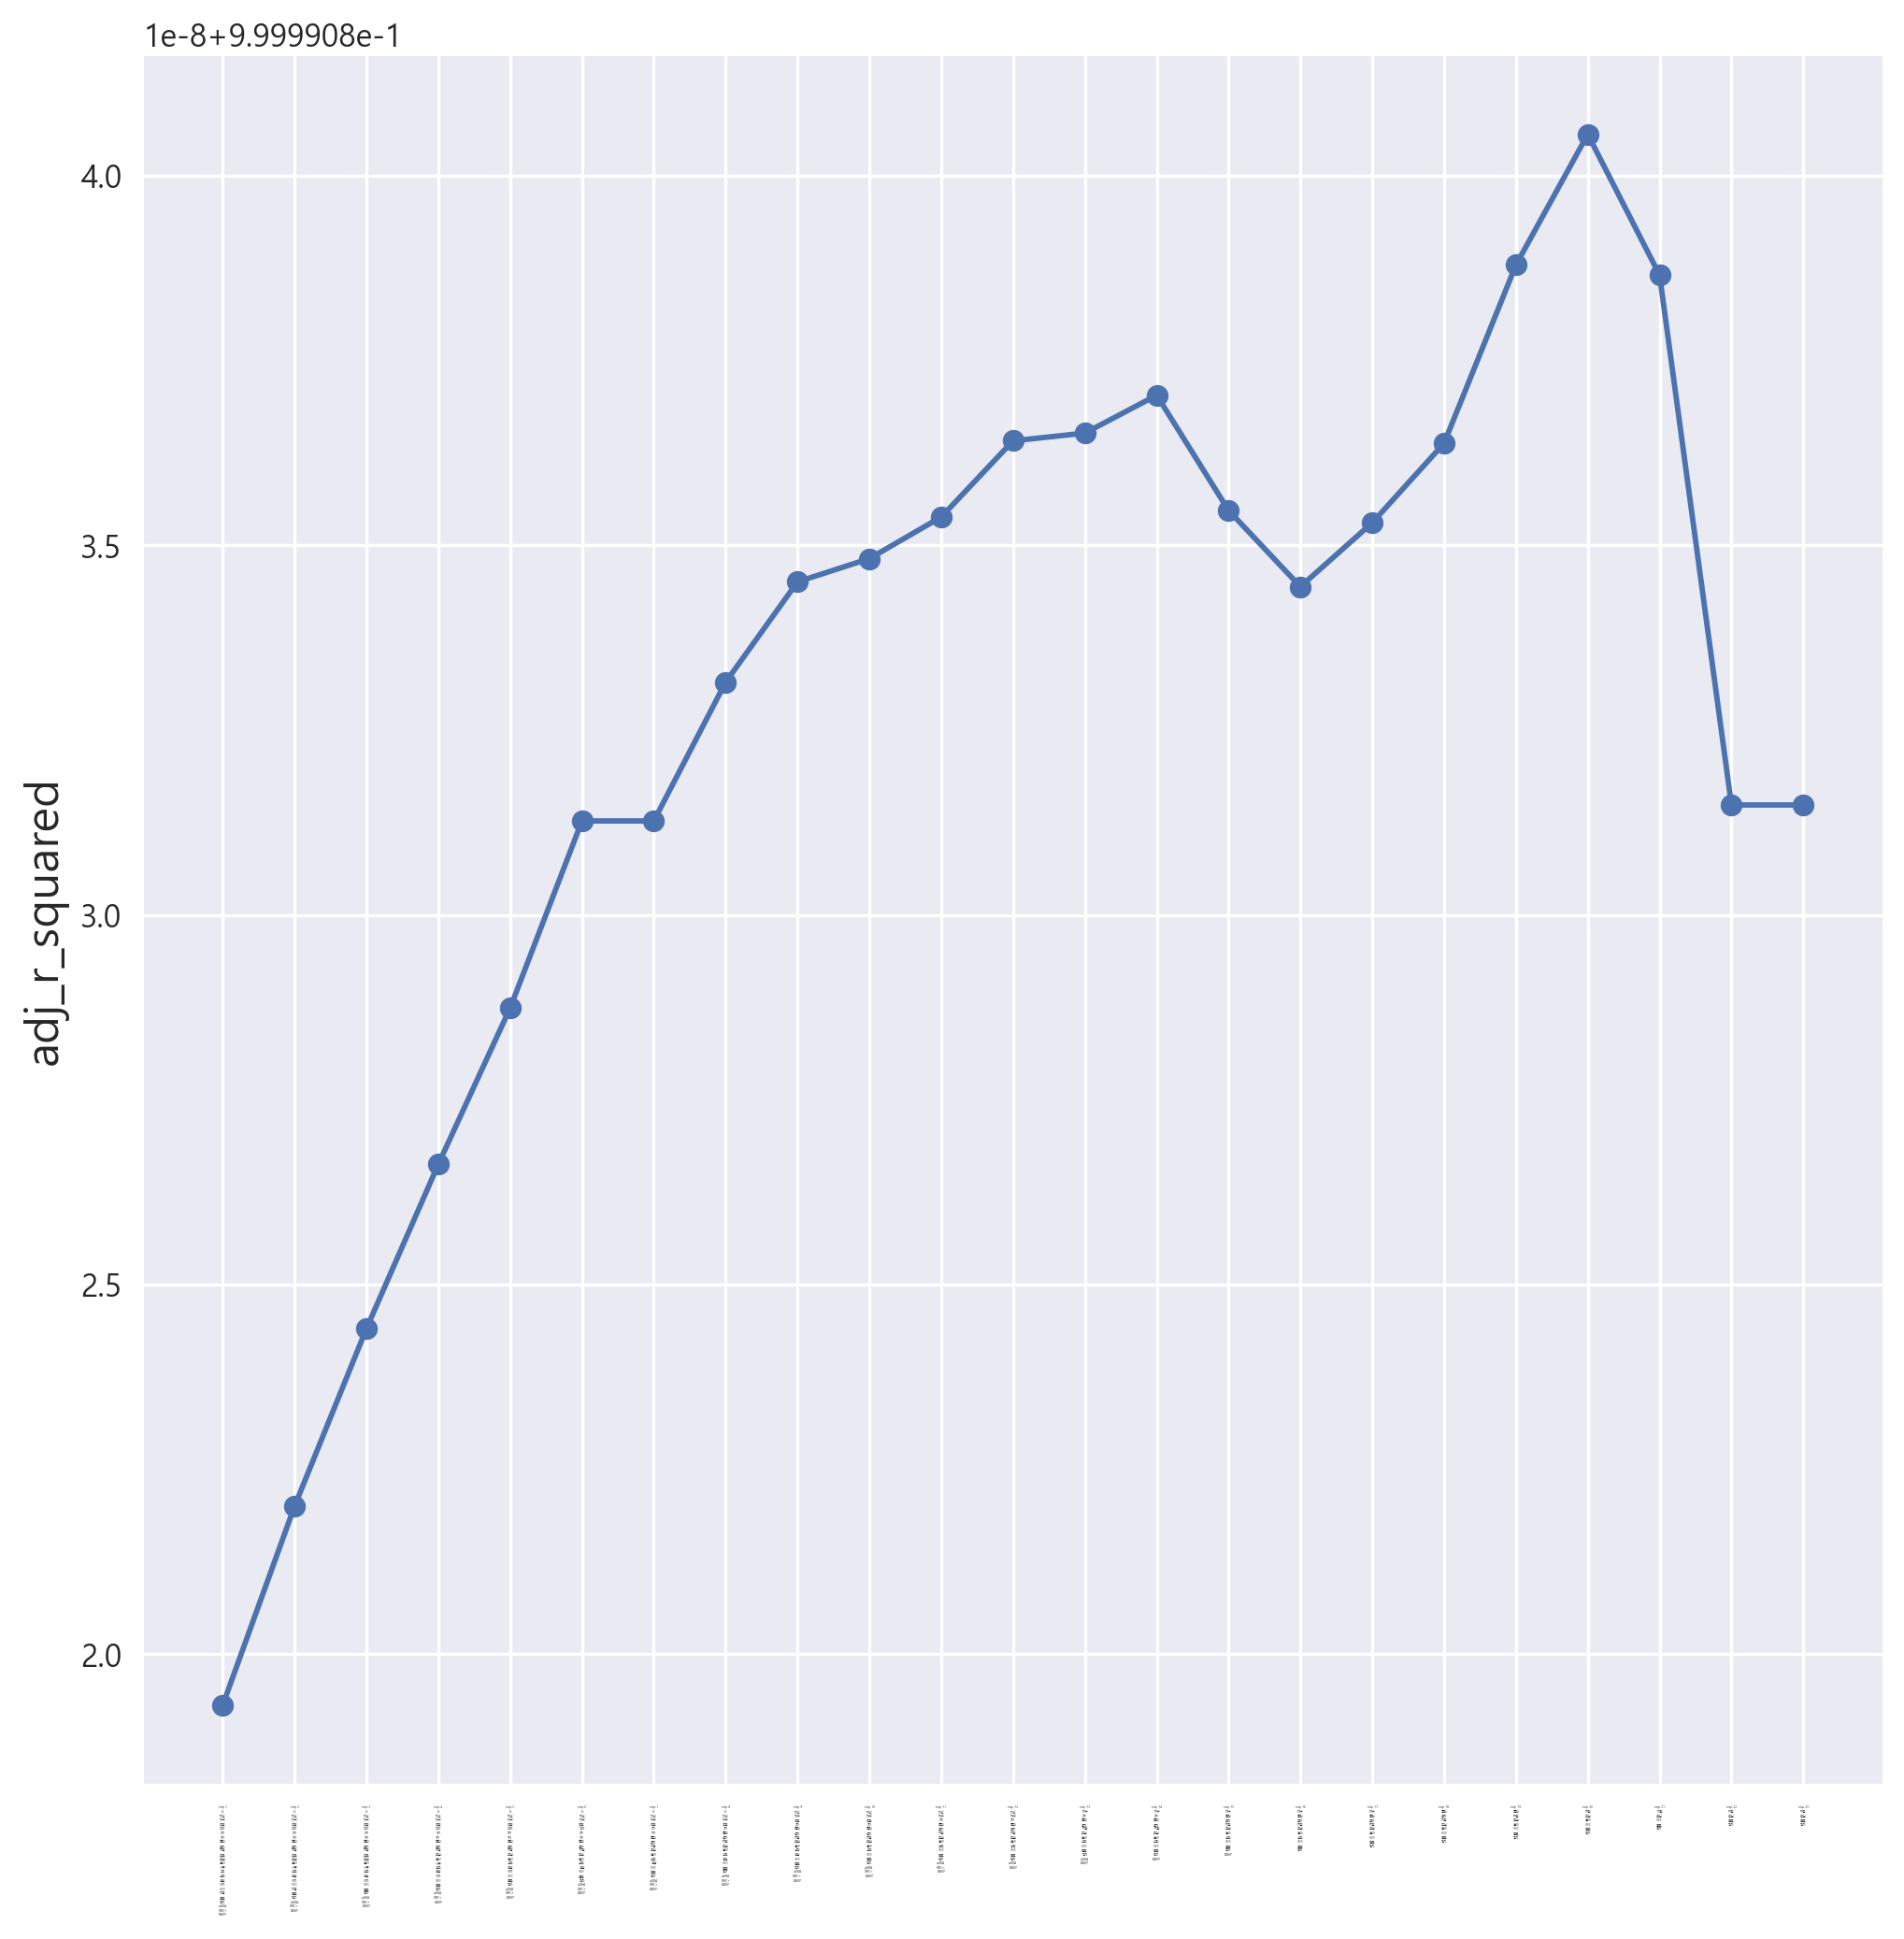

In [110]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=1)
plt.plot(steps, adj_r_squared_list, marker='o')
    
plt.ylabel('adj_r_squared',fontsize=font_size)
plt.grid(True)
plt.show()

In [113]:
model = sm.OLS(y_train, sm.add_constant(pd.DataFrame(x_train[backward_valriables_function]))).fit(disp=0)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    OPS   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.205e+07
Date:                Tue, 07 Mar 2023   Prob (F-statistic):               0.00
Time:                        19:28:02   Log-Likelihood:                 20963.
No. Observations:                3377   AIC:                        -4.192e+04
Df Residuals:                    3372   BIC:                        -4.189e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        8.53e-06   4.83e-05      0.177      0.860   -8.61e-05       0.000
타점          9.663e-07   4.49e-07      2.150      0.032    8.52e-08    1.85e-06
도실          -7.43e-06    3.2e-06     -2.324      0.020   -1.37e-05   -1.16e-06
출루             1.0000      0.000   4971.106      0.000       1.000       1.000
장타             0.9999      0.000   7233.444      0.000       1.000       1.000
==============================================================================
Omnibus:                       85.201   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.629
Skew:                          -0.019   Prob(JB):                     2.72e-44
Kurtosis:                       4.194   Cond. No.                     1.07e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

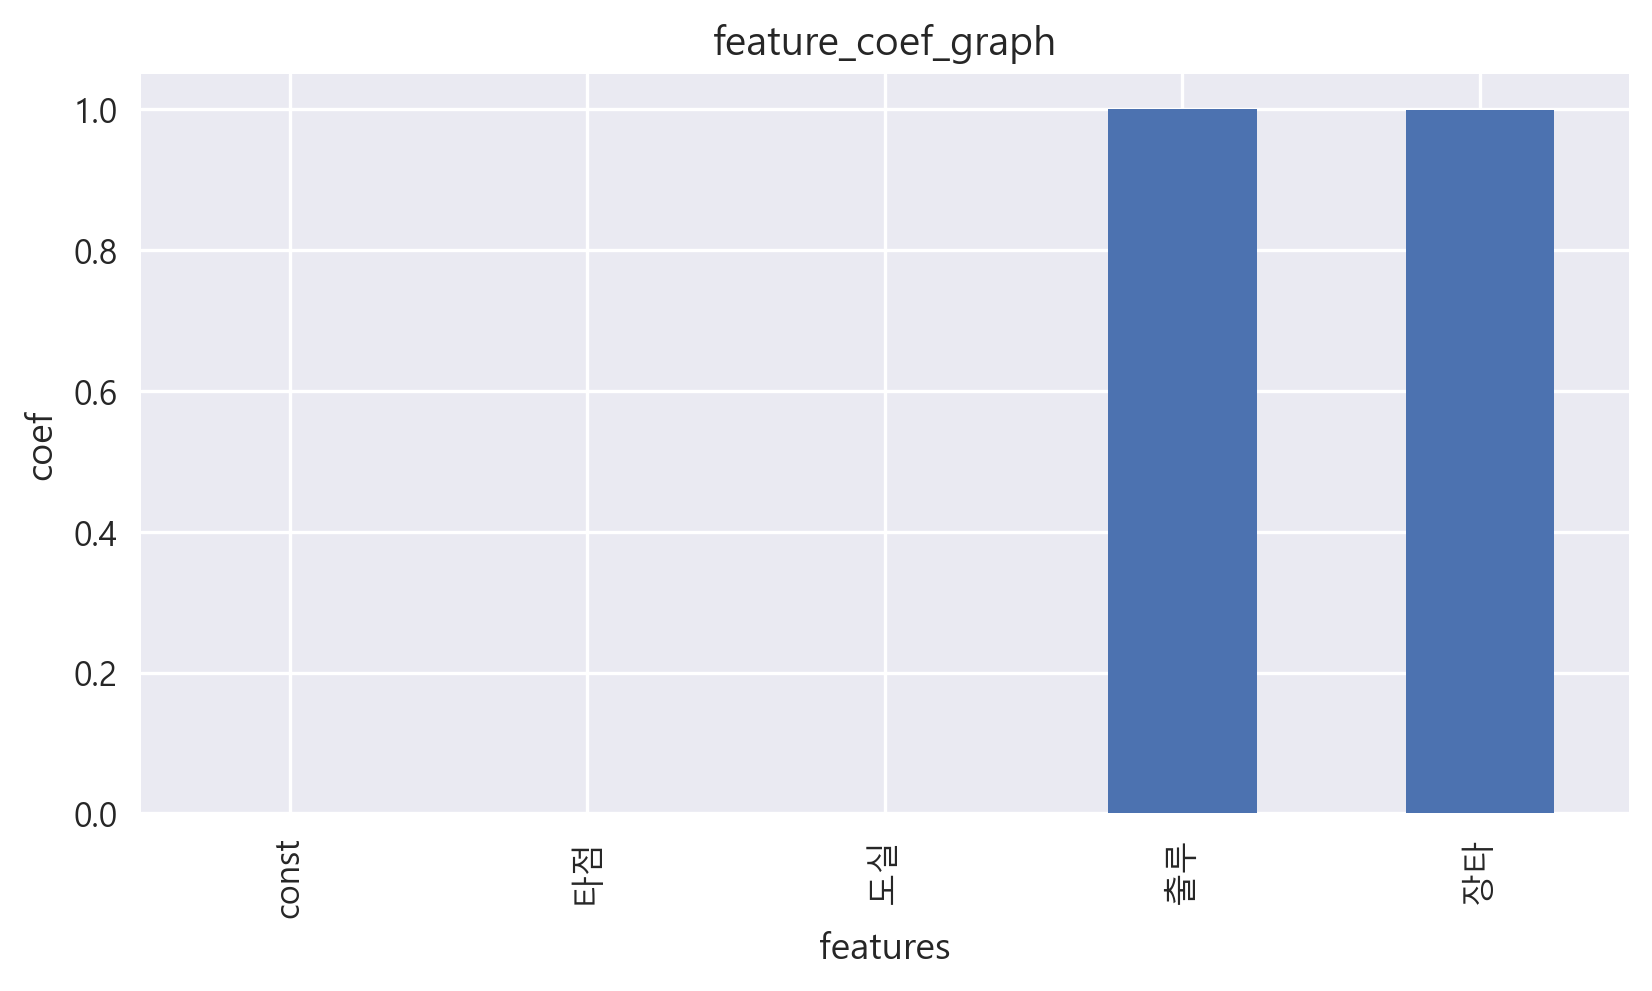

In [114]:
# 계수 시각화
# 회귀 계수를 시리즈로 변환
coefs = model.params.tolist()
coefs_se = pd.Series(coefs)

# 변수명을 리스트로 반환
x_labels = model.params.index.tolist()

ax = coefs_se.plot(kind = "bar")
ax.set_title("feature_coef_graph")
ax.set_xlabel("features")
ax.set_ylabel("coef")
ax.set_xticklabels(x_labels)
plt.show()

In [119]:
x_train.shape

(3377, 26)

In [131]:
# 피처마다 VIF 계수를 출력
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(x_train, i) for i in range(x_train.shape[1])]
vif["feature"] = x_train.columns
vif.round(1)

,VIF_Factor,feature
0,19.30000,WAR
1,37.00000,G
2,5202950.10000,타석
3,3942074.50000,타수
4,53.10000,득점
5,inf,안타
6,inf,2타
7,inf,3타
8,inf,홈런
9,inf,루타


In [130]:
# 피처마다 VIF 계수를 출력
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(x_train[backward_valriables_function], i) for i in range(x_train[backward_valriables_function].shape[1])]
vif["feature"] = x_train[backward_valriables_function].columns
vif.round(1)

,VIF_Factor,feature
0,3.80000,타점
1,1.90000,도실
2,30.70000,출루
3,37.10000,장타


# modeling

In [153]:
rf = RandomForestRegressor()

In [154]:
rf.fit(x_train, y_train)

RandomForestRegressor()

In [155]:
rf.score(x_test, y_test)

0.9962319252182849

In [156]:
pred = rf.predict(x_test)

In [157]:
np.sqrt(mean_squared_error(y_test, pred))

0.01006778447625668

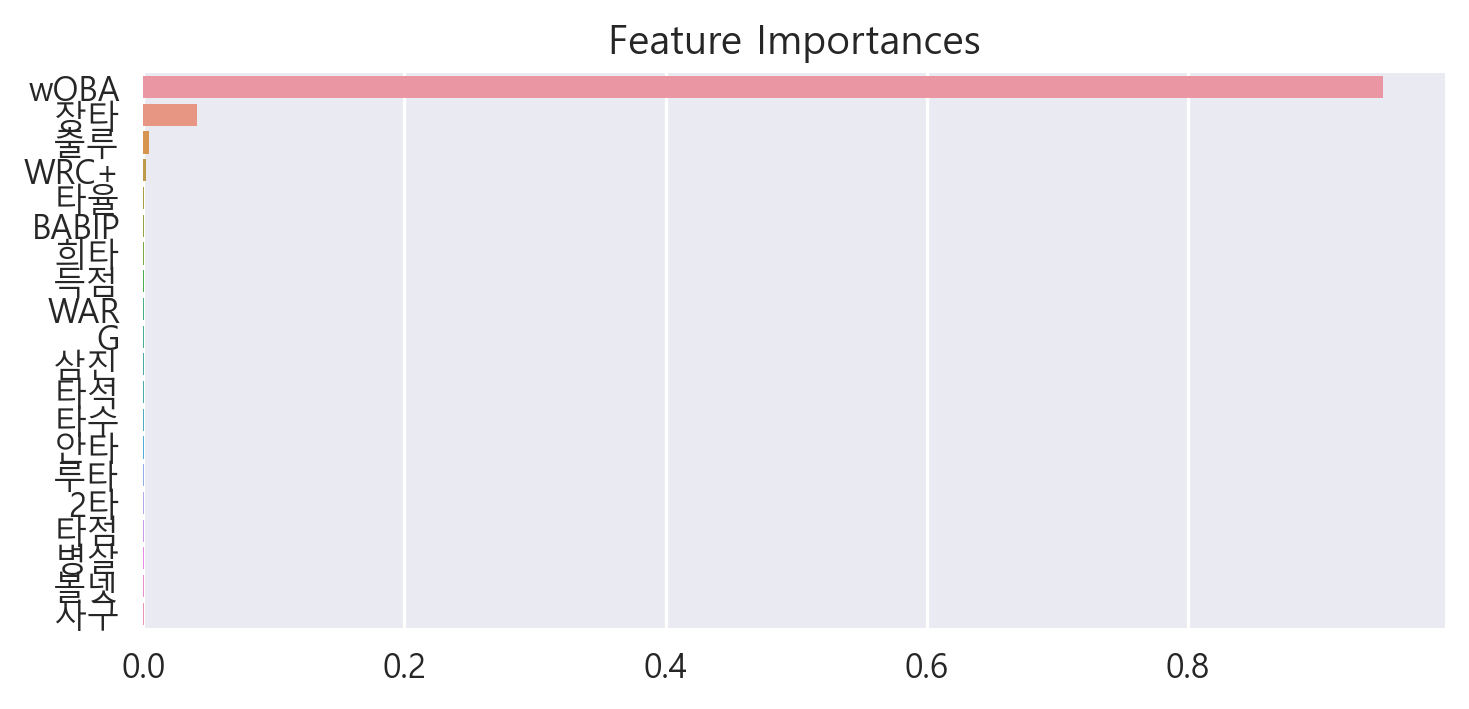

In [158]:
# 특성중요도 확인
fea_importance = rf.feature_importances_
fea_importances = pd.Series(fea_importance, index = x_train.columns)
fea_20 = fea_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(7,3))
plt.title('Feature Importances')
sns.barplot(x=fea_20, y=fea_20.index)
plt.show()

- 랜덤 포레스트, 트리 계열 알고리즘의 특징인 특성 중요도로 변수 선택을 하였다.
- 특성 중요도, 즉 컬럼에 영향을 미치는 영향이 큰 wOBA, WRC+, 장타 위의 3가지 변수가 가장 종속변수인 OPS에 큰 영향을 미쳤고 이에 따라 위의 3가지 변수만 선택하여 모델링을 진행

In [159]:
X = df[["wOBA", "출루", "장타"]]
y = df["OPS"]

In [160]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

In [161]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3377, 3), (845, 3), (3377,), (845,))

In [162]:
np.random.seed(29)

In [163]:
preprocess = FeatureUnion([("std", StandardScaler())])

In [164]:
pipe = Pipeline([("preprocess", preprocess),
                ("classifier", RandomForestRegressor())])

In [165]:
search_space = [{"classifier" : [LinearRegression()]},
                {"classifier" : [Ridge()]},
                {"classifier" : [Lasso()]},
                {"classifier" : [ElasticNet()]},
                {"classifier" : [ARDRegression()]},
                {"classifier" : [BayesianRidge()]},
                {"classifier" : [RandomForestRegressor()],
                 "classifier__n_estimators" : [10, 100, 1000],
                 "classifier__max_features" : [1, 2, 3],
                 "classifier__min_impurity_decrease" : [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]},
                 {"classifier" : [SVR()],
                  "classifier__kernel" : ["rbf", "poly"],
                  "classifier__C" : np.arange(0, 1, 0.1)}]

In [166]:
gridsearch = GridSearchCV(pipe, search_space, cv=5, verbose=2)

In [167]:
best_model = gridsearch.fit(x_train, y_train)

Fitting 5 folds for each of 71 candidates, totalling 355 fits
[CV] END ......................classifier=LinearRegression(); total time=   0.0s
[CV] END ......................classifier=LinearRegression(); total time=   0.0s
[CV] END ......................classifier=LinearRegression(); total time=   0.0s
[CV] END ......................classifier=LinearRegression(); total time=   0.0s
[CV] END ......................classifier=LinearRegression(); total time=   0.0s
[CV] END .................................classifier=Ridge(); total time=   0.0s
[CV] END .................................classifier=Ridge(); total time=   0.0s
[CV] END .................................classifier=Ridge(); total time=   0.0s
[CV] END .................................classifier=Ridge(); total time=   0.0s
[CV] END .................................classifier=Ridge(); total time=   0.0s
[CV] END .................................classifier=Lasso(); total time=   0.0s
[CV] END .................................class

In [168]:
best_model.best_estimator_

Pipeline(steps=[('preprocess',
                 FeatureUnion(transformer_list=[('std', StandardScaler())])),
                ('classifier', ARDRegression())])

In [169]:
grid_pred = best_model.predict(x_test)

In [170]:
# 랜덤포레스트 베이스 모델
np.sqrt(mean_squared_error(y_test, pred))

0.01006778447625668

In [171]:
# 그리드 서치를 통한 모델
np.sqrt(mean_squared_error(y_test, grid_pred))

0.00048036917869845016

- 랜덤 포레스트 베이스 모델을 사용하여 선택한 것 보다 더 좋은 결과를 확인 할 수 있다.

In [172]:
X = df.drop("OPS", axis=1)
y = df["OPS"] 

In [173]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

In [174]:
preprocess_all = FeatureUnion([("std", StandardScaler()), ("pca", PCA())])

In [175]:
pipe = Pipeline([("preprocess", preprocess),
                ("classifier", RandomForestRegressor())])

In [176]:
search_space = [{"classifier" : [LinearRegression()]},
                {"classifier" : [Ridge()]},
                {"classifier" : [Lasso()]},
                {"classifier" : [ElasticNet()]},
                {"classifier" : [ARDRegression()]},
                {"classifier" : [BayesianRidge()]},
                {"classifier" : [RandomForestRegressor()],
                 "classifier__n_estimators" : [10, 100, 1000],
                 "classifier__max_features" : [1, 2, 3],
                 "classifier__min_impurity_decrease" : [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]},
                 {"classifier" : [SVR()],
                  "classifier__kernel" : ["rbf", "poly"],
                  "classifier__C" : np.arange(0, 1, 0.1)}]

In [177]:
gridsearch_all = GridSearchCV(pipe, search_space, cv=5, verbose=2)

In [178]:
best_model_all = gridsearch_all.fit(x_train, y_train)

Fitting 5 folds for each of 71 candidates, totalling 355 fits
[CV] END ......................classifier=LinearRegression(); total time=   0.0s
[CV] END ......................classifier=LinearRegression(); total time=   0.0s
[CV] END ......................classifier=LinearRegression(); total time=   0.0s
[CV] END ......................classifier=LinearRegression(); total time=   0.0s
[CV] END ......................classifier=LinearRegression(); total time=   0.0s
[CV] END .................................classifier=Ridge(); total time=   0.0s
[CV] END .................................classifier=Ridge(); total time=   0.0s
[CV] END .................................classifier=Ridge(); total time=   0.0s
[CV] END .................................classifier=Ridge(); total time=   0.0s
[CV] END .................................classifier=Ridge(); total time=   0.0s
[CV] END .................................classifier=Lasso(); total time=   0.0s
[CV] END .................................class

In [179]:
best_model_all.best_estimator_

Pipeline(steps=[('preprocess',
                 FeatureUnion(transformer_list=[('std', StandardScaler())])),
                ('classifier', ARDRegression())])

In [180]:
pred_all = best_model_all.predict(x_test)

In [181]:
print(f"base model rmse : {np.sqrt(mean_squared_error(y_test, pred))}")
print(f"랜덤포레스트 feature_importances를 활용한 후 rmse : {np.sqrt(mean_squared_error(y_test, grid_pred))}")
print(f"모든 데이터를 활용하여 전처리 후 rmse : {np.sqrt(mean_squared_error(y_test, pred_all))}")

base model rmse : 0.01006778447625668
랜덤포레스트 feature_importances를 활용한 후 rmse : 0.00048036917869845016
모든 데이터를 활용하여 전처리 후 rmse : 0.00048036917869845026


- 모든 데이터를 활용하여 정규화와 차원축소를 이용하여 데이터를 전처리 한 후 결과가 가장 좋게 나타났다.

In [182]:
test = pd.read_csv("./data/test.csv")

In [183]:
test

,이름,팀,WAR,G,타석,타수,득점,안타,2타,3타,...,병살,희타,희비,타율,출루,장타,OPS,wOBA,WRC+,BABIP
0,이정후,22키CF,9.23000,142,627,553,85,193,36,10,...,10,0,3,0.34900,0.42100,0.57500,0.99600,0.44100,182.50000,0.33932
1,피렐라,22삼LF,7.40000,141,630,561,102,192,33,4,...,19,0,2,0.34200,0.41100,0.56500,0.97600,0.43400,169.30000,0.36123
2,나성범,22KRF,6.50000,144,649,563,92,180,39,2,...,7,0,5,0.32000,0.40200,0.50800,0.91000,0.41100,157.40000,0.38780
3,오지환,22LSS,5.77000,142,569,494,75,133,16,4,...,11,3,3,0.26900,0.35700,0.47000,0.82700,0.37200,138.60000,0.29589
4,최정,22S3B,5.15000,121,505,414,80,110,21,0,...,6,0,6,0.26600,0.38600,0.50500,0.89100,0.40000,145.40000,0.28188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,조세진,22롯RF,-0.76000,39,88,86,6,16,3,0,...,4,1,0,0.18600,0.19500,0.22100,0.41600,0.19200,5.70000,0.26230
239,유로결,22한LF,-0.82000,30,68,60,5,8,0,0,...,1,3,0,0.13300,0.20000,0.13300,0.33300,0.16400,-11.40000,0.15686
240,정보근,22롯C,-0.91000,95,226,199,8,38,2,0,...,4,10,1,0.19100,0.25000,0.21600,0.46600,0.21800,24.10000,0.25694
241,박경수,22K2B,-1.01000,100,194,166,13,20,3,0,...,3,2,1,0.12000,0.23400,0.19300,0.42700,0.21300,21.90000,0.18085


In [184]:
test.drop(["이름", "팀"], axis=1, inplace=True)

In [185]:
X = test.drop("OPS", axis=1)
y = test["OPS"]

In [186]:
test_predict = best_model_all.predict(X)

In [187]:
print(f"실제 데이터와의 rmse : {np.sqrt(mean_squared_error(y, test_predict))}")

실제 데이터와의 rmse : 0.0004537000787348292


In [189]:
test_predict.

array([ 9.96004093e-01,  9.76003658e-01,  9.10000950e-01,  8.26999330e-01,
        8.91000881e-01,  7.95997357e-01,  8.48000502e-01,  8.47999389e-01,
        7.75996021e-01,  7.87997183e-01,  8.59999703e-01,  8.65998509e-01,
        7.48994613e-01,  8.32998295e-01,  8.32999037e-01,  8.50999640e-01,
        9.08003662e-01,  8.41999471e-01,  8.16998742e-01,  7.48994401e-01,
        8.81000770e-01,  7.14994456e-01,  7.91997853e-01,  8.07998625e-01,
        7.58995837e-01,  7.89997704e-01,  7.99998928e-01,  7.44993625e-01,
        7.94998157e-01,  6.83993119e-01,  7.69997799e-01,  7.90997752e-01,
        7.23993512e-01,  8.36000400e-01,  7.55995003e-01,  7.36995093e-01,
        7.12994995e-01,  6.94993915e-01,  8.22996805e-01,  8.71001188e-01,
        8.11997281e-01,  7.08996127e-01,  6.76993735e-01,  9.05000285e-01,
        7.86996923e-01,  7.18993377e-01,  7.09994003e-01,  7.38996515e-01,
        6.92992652e-01,  7.13994408e-01,  6.72994814e-01,  7.14993502e-01,
        8.33998396e-01,  

In [195]:
test_df = pd.DataFrame({"real" : y, "pred" : test_predict})

In [212]:
test_df

,real,pred
0,0.99600,0.99600
1,0.97600,0.97600
2,0.91000,0.91000
3,0.82700,0.82700
4,0.89100,0.89100
...,...,...
238,0.41600,0.41599
239,0.33300,0.33298
240,0.46600,0.46599
241,0.42700,0.42699


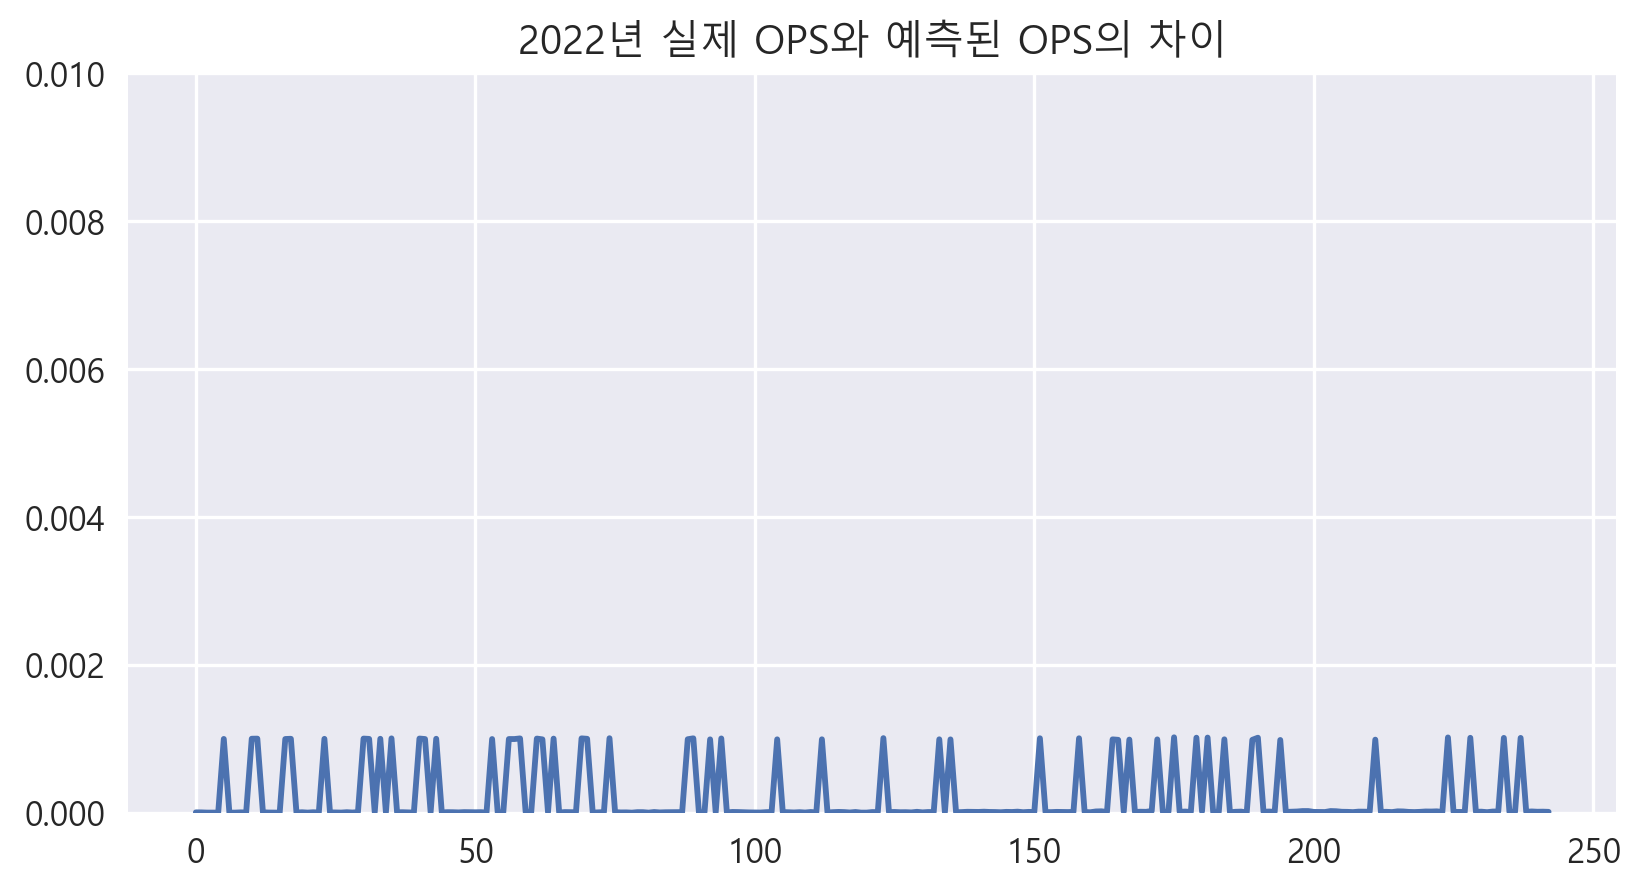

In [230]:
abs(test_df["real"] - test_df["pred"]).plot()
plt.title("2022년 실제 OPS와 예측된 OPS의 차이")
plt.ylim([0.0, 0.01])
plt.show()

<AxesSubplot: >

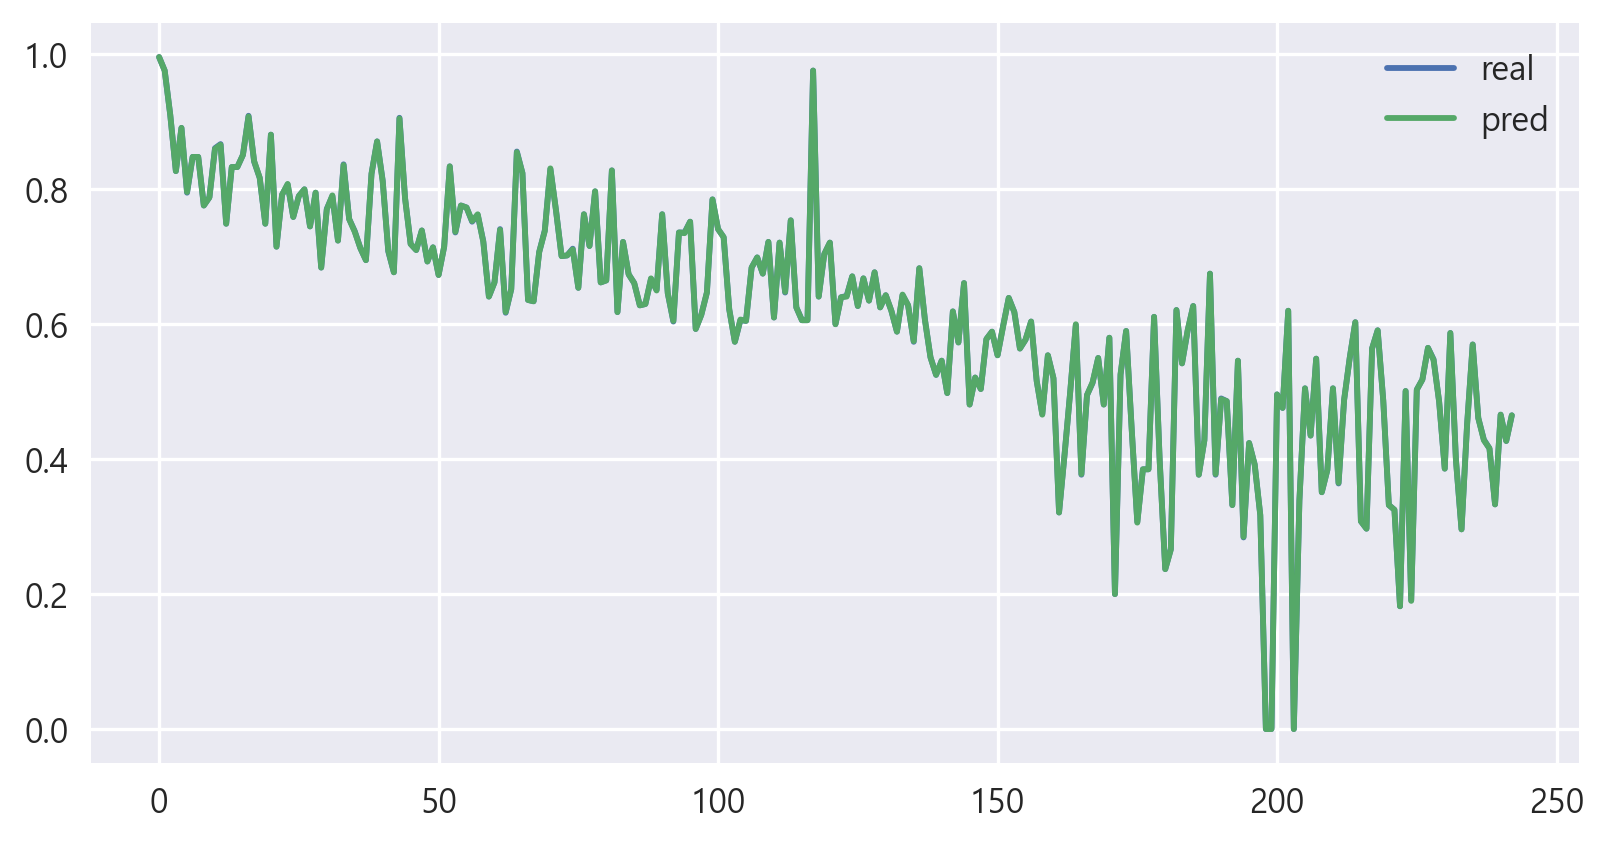

In [214]:
test_df.plot()